# News Mood 

In [9]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [55]:
target = ("@BBC", "@CBS", "@CNN", "@Fox", "@nytimes")

sentiment = []

for news in target:
    counter = 0
    for x in range(5):
        tweets = api.user_timeline(news)
        for tweet in tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            
            counter += 1
        
            sentiment.append({"User": news,
                              "Compound": compound,
                              "Positive": pos,
                              "Neutral": neu,
                              "Negative": neg,
                              "Date": tweet["created_at"],
                              "Tweets Ago": counter})
#print(sentiment)
#print()

In [56]:
sentiment_pd = pd.DataFrame.from_dict(sentiment)
sentiment_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,-0.5719,Sun Jun 10 19:04:08 +0000 2018,0.239,0.761,0.000,1,@BBC
1,0.4588,Sun Jun 10 18:02:27 +0000 2018,0.000,0.880,0.120,2,@BBC
2,0.0000,Sun Jun 10 17:03:05 +0000 2018,0.000,1.000,0.000,3,@BBC
3,0.0000,Sun Jun 10 16:02:05 +0000 2018,0.000,1.000,0.000,4,@BBC
4,0.6808,Sun Jun 10 15:22:00 +0000 2018,0.000,0.804,0.196,5,@BBC


In [72]:
BBC = sentiment_pd[sentiment_pd["User"] == "@BBC"]
CBS = sentiment_pd[sentiment_pd["User"] == "@CBS"]
CNN = sentiment_pd[sentiment_pd["User"] == "@CNN"]
FOX = sentiment_pd[sentiment_pd["User"] == "@Fox"]
NYT = sentiment_pd[sentiment_pd["User"] == "@nytimes"]

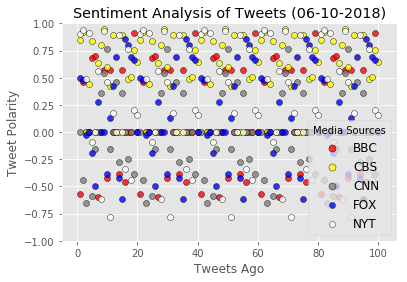

In [108]:
#Scatterplot
#BBC
BBC_X = BBC["Tweets Ago"]
BBC_Y = BBC["Compound"]
plt.scatter(BBC_X, BBC_Y, marker='o', color='red', edgecolor='black', linewidth=.5, alpha=.8, label="BBC")

#CBS
CBS_X = CBS["Tweets Ago"]
CBS_Y = CBS["Compound"]
plt.scatter(CBS_X, CBS_Y, marker='o', color='yellow', edgecolor='black', linewidth=.5, alpha=.8, label="CBS")

#CNN
CNN_X = CNN["Tweets Ago"]
CNN_Y = CNN["Compound"]
plt.scatter(CNN_X, CNN_Y, marker='o', color='grey', edgecolor='black', linewidth=.5, alpha=.8, label="CNN")

#FOX
FOX_X = FOX["Tweets Ago"]
FOX_Y = FOX["Compound"]
plt.scatter(FOX_X, FOX_Y, marker='o', color='blue', edgecolor='black', linewidth=.5, alpha=.8, label="FOX")

#NYT
NYT_X = NYT["Tweets Ago"]
NYT_Y = NYT["Compound"]
plt.scatter(NYT_X, NYT_Y, marker='o', color='white', edgecolor='black', linewidth=.5, alpha=.8, label="NYT")

now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Sentiment Analysis of Tweets ({now})")

plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim((-1,1))

lgnd = plt.legend(fontsize="large", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc='best', title="Media Sources",
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]